In [1]:
#@ IMPORTING THE LIBRARIES AND DEPENDENCIES
import matplotlib.pyplot as plt
import numpy as np
import cv2

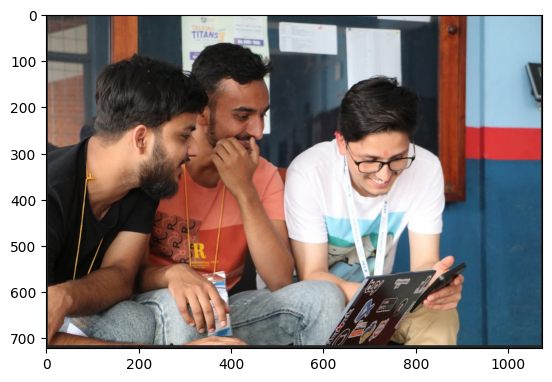

In [2]:
#@ LOADING THE IMAGE
def reading_file(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)         # convert to RGB Image
    plt.imshow(img)
    plt.show()
    return img

filename = "hencies.png"
img = reading_file(filename)

orginal_image = np.copy(img)

In [3]:
#@ CREATING EDGE MASK: takes image as input and return edges of images 
def edge_mask(img, line_size, blur_value):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)

    edges = cv2.adaptiveThreshold(gray_blur, 
                                  255, 
                                  cv2.ADAPTIVE_THRESH_MEAN_C, 
                                  cv2.THRESH_BINARY, 
                                  line_size, 
                                  blur_value)
    return edges


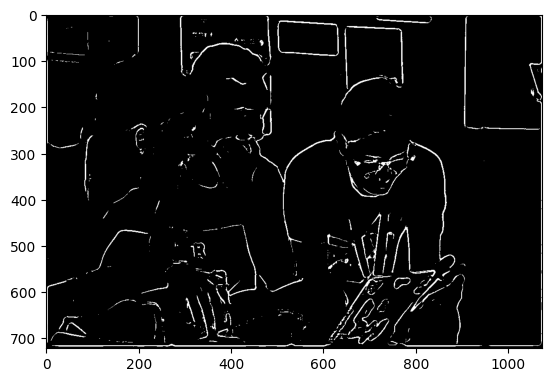

In [4]:
line_size, blur_value = 7,9
edges = edge_mask(img, line_size, blur_value)
plt.imshow(edges, cmap='binary')
plt.show()

In [5]:
#@ REDUCING THE COLOR PALETTE
def color_quantization(img, k):
    
    data = np.float32(img).reshape((-1, 3))                                                      # Transforming the Image
    
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)                   # Determine Criteria 
    
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)          # Implementing K-Means
    center = np.uint8(center)
    
    result = center[label.flatten()]
    result = result.reshape((img.shape))
    
    return result

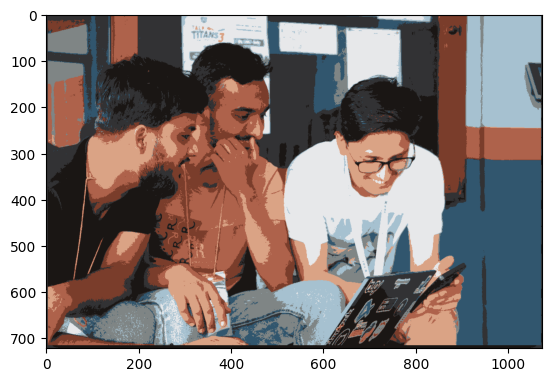

In [6]:
#@ QUANTIZATION OF THE IMAGE
img_quantized = color_quantization(img, k=9)
plt.imshow(img_quantized)
plt.show()

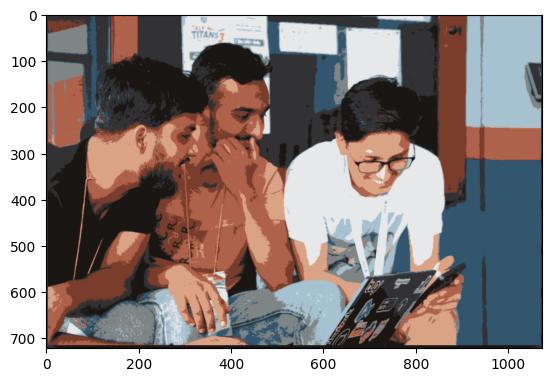

In [7]:
#@ ADDING MORE FILTERS TO REDUCE MORE NOISE
blurred = cv2.bilateralFilter(img_quantized, 
                              d=2, 
                              sigmaColor=200, 
                              sigmaSpace=200)

plt.imshow(blurred)
plt.show()

In [8]:
#@ COMBINE EDGE MASK WITH THE QUANTIZED IMAGE
def cartoon():
    c = cv2.bitwise_and(blurred, 
                        blurred, 
                        mask=edges)
    plt.imshow(c)
    plt.title("Cartoonfied Image")
    plt.show()

    plt.imshow(orginal_image)
    plt.title("Orginal Image")
    plt.show()

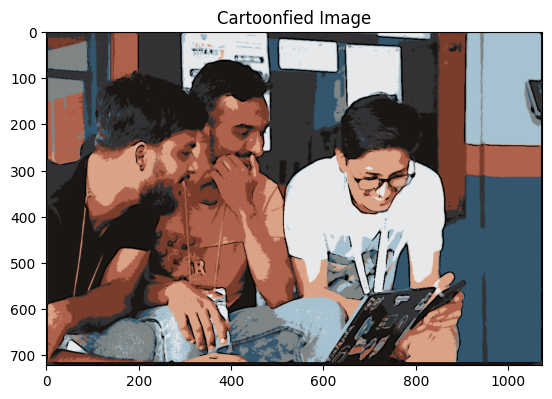

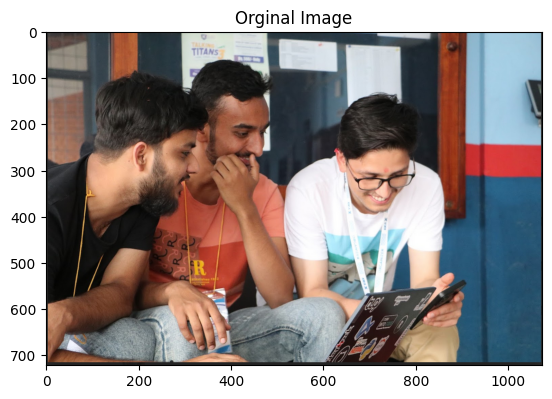

In [9]:
cartoon()

**Thenku**